# <center>**Predicting Crime: Uncovering Crime Patterns with Data Science**</center>
### <center>***By Jarred De Azevedo, Misha Khan, Kenneth Swindell, Chethan Agarwal, David Bond, Carson Hagman***</center>

#### Contributions:

**Jarred**: Worked on the title, summarized the contributions of each group member, and completed the introduction. Stated what our topic is, the questions being answered through the analysis, and why answering those questions are important.

**Misha**: Worked on dataset curation and preprocessing. Cited the sources of our data, explained what they are, and transformed the data to be ready for analysis by organizing a pandas dataframe.

**Kenneth**: Worked on data exploration and summary statistics. Presented three conclusions about the crime data using three different statistical methods: chi-squared test with a p-value of 0.05, summary statistics, and a KDE plot.

**Chethan**: Worked on the primary analysis (ML Algorithm Design/Development, Training and Test Data Analysis). Based on the results of the data exploration, performed K-Means Clustering to help answer the questions posed in the introduction.

**David**: Worked on visualization. Used plots to explain the results and insights of the primary analysis.

**Carson**: Worked on result analysis and conclusion. Used the data analysis to draw conclusions and give answers to the questions posed in the introduction.

### <center>Introduction</center>

Understanding crime patterns is a crucial step toward building safer, more equitable communities. In this tutorial, we explore how data science can be used to analyze crime and policing data to uncover meaningful trends and inform public policy. Our project centers around two key questions: "Can historical crime trends help predict future criminal activity?" and "Are certain geographic areas more prone to specific types of crime?".

These questions are important because by answering them, we can contribute to a data-driven approach to public safety - one that goes beyond anecdotal evidence and offers insights grounded in empirical analysis; predictive models can help law enforcement allocate resources more efficiently, while geographic patterns of crime can inform urban planning and community intervention programs. At the same time, critically analyzing policing data allows us to consider potential biases and systemic issues in law enforcement practices.

Through the full data science pipeline: acquiring and curating data, parsing the data into a queryable format, exploratory data analysis, hypothesis testing and machine learning, and explaining the results with words and visualizations, we will guide readers step-by-step through how we approached this real-world problem. Our goal is to not only generate insights from the data but also provide a clear, reproducible framework for others to do the same.

### <center>Data Curation and Preprocessing</center>

To begin to answer these questions and perform our analysis, we must first find and choose the proper dataset. It must be large enough and properly processed in order for hypothesis testing and machine learning to be done successfully. We specifically chose to focus on New York City because the area is small enough to find trends but also diverse in order to get accurate unbiased results.

The dataset we chose is NYPD Shooting Incidident Data (Historic) from the City of New York, published on Data.gov. This dataset contains detailed information on past shooting incidents. Each incidident contains information about the date, time, New York borough, location, and several details about the perpetrator and the victim. In order to prepare the data for analysis, a pandas dataframe has been created below.

Publisher data.cityofnewyork.us. (2025, April 19). City of New York - NYPD shooting incident data (historic). Catalog. https://catalog.data.gov/dataset/nypd-shooting-incident-data-historic

In [15]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df.head()

# Convert date columns to datetime format
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors='coerce')
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S', errors='coerce')

df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,231974218,2021-08-09,1900-01-01 01:06:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.006343e+06,234270.000000,40.809673,-73.920193,POINT (-73.92019278899994 40.80967347200004)
1,177934247,2018-04-07,1900-01-01 19:48:00,BROOKLYN,NaN,79,0.0,NaN,NaN,True,...,M,WHITE HISPANIC,25-44,M,BLACK,1.000083e+06,189064.671875,40.685610,-73.942913,POINT (-73.94291302299996 40.685609672000055)
2,255028563,2022-12-02,1900-01-01 22:57:00,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,...,(null),(null),25-44,M,BLACK,1.020691e+06,257125.000000,40.872349,-73.868233,POINT (-73.868233 40.872349)
3,25384540,2006-11-19,1900-01-01 01:50:00,BROOKLYN,NaN,66,0.0,NaN,PVT HOUSE,True,...,U,UNKNOWN,18-24,M,BLACK,9.851073e+05,173349.796875,40.642490,-73.996912,POINT (-73.99691224999998 40.642489932000046)
4,72616285,2010-05-09,1900-01-01 01:58:00,BRONX,NaN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,...,M,BLACK,<18,F,BLACK,1.009854e+06,247502.562500,40.845984,-73.907461,POINT (-73.90746098599993 40.84598358900007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,82565818,2012-01-10,1900-01-01 16:52:00,MANHATTAN,NaN,23,2.0,NaN,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK HISPANIC,25-44,M,WHITE HISPANIC,1.000102e+06,229680.187500,40.797089,-73.942750,POINT (-73.94275038599994 40.79708909900006)
28558,52550581,2008-10-27,1900-01-01 19:00:00,BROOKLYN,NaN,83,0.0,NaN,MULTI DWELL - APT BUILD,False,...,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1.004686e+06,193261.375000,40.697119,-73.926302,POINT (-73.92630225199997 40.697119222000026)
28559,23354135,2006-07-10,1900-01-01 19:47:00,BROOKLYN,NaN,60,0.0,NaN,NaN,False,...,M,BLACK,<18,M,BLACK,9.841473e+05,150277.703125,40.579162,-74.000371,POINT (-74.00037110599999 40.57916181000007)
28560,59753078,2009-03-20,1900-01-01 20:02:00,BROOKLYN,NaN,72,0.0,NaN,MULTI DWELL - APT BUILD,False,...,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,9.809204e+05,174343.578125,40.645217,-74.012000,POINT (-74.01199971799997 40.645217064000065)


### <center>Data Exploration and Summary Statistics</center>

To analyze the distribution of shooting incidents across New York City, we conducted a statistical analysis using Python. First, we examined whether incidents were evenly distributed across boroughs by generating a contingency table of shooting counts by borough and applying a chi-squared test for independence. The resulting p-value helped us determine if the variation in incident counts was statistically significant. We supported this analysis with a bar chart showing the number of incidents in each borough. Next, we analyzed the times at which shootings occurred by converting the reported incident times into datetime format. We calculated summary statistics to understand the overall distribution and used a boxplot to visualize how incidents were spread throughout the day. This allowed us to observe that while the distribution was slightly left-skewed, there were no extreme outliers, with most shootings occurring either early in the morning or late at night.

Chi-squared statistic: 114248.0
p-value: 0.0


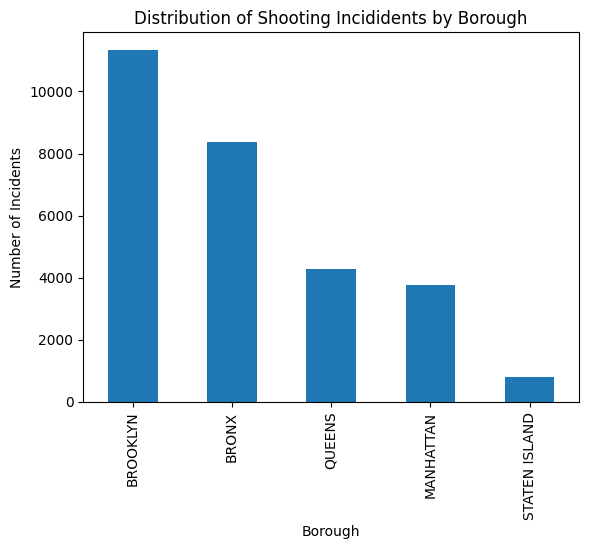



Summary statistics for the 'OCCUR_TIME' column (disregard the date): 
 count                            28562
mean     1900-01-01 12:44:16.713115392
min                1900-01-01 00:00:00
25%                1900-01-01 03:30:00
50%                1900-01-01 15:15:00
75%                1900-01-01 20:45:00
max                1900-01-01 23:59:00
Name: OCCUR_TIME, dtype: object


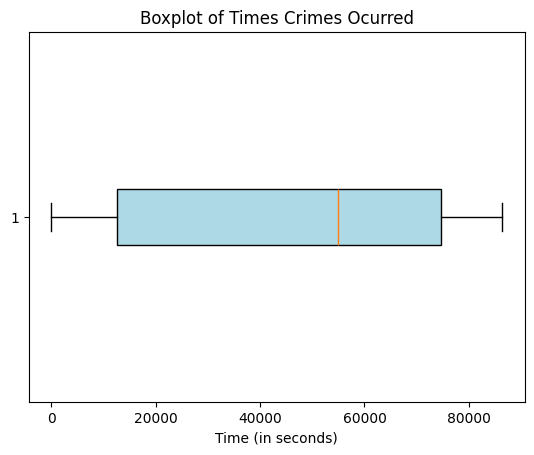

In [16]:
# conclusion 1: Shooting incidents are not evenly distributed across boroughs
# statistical method: chi-squared test with a p-value of 0.05
# H0: there is no association between the borough and the occurence of shooting incidents
# H1: There is an association, the distribution of shooting incidents is not the same across all boroughs

observed = pd.crosstab(df['BORO'], df['INCIDENT_KEY']).values
chi2, p, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")

df['BORO'].value_counts().plot(kind='bar', title='Distribution of Shooting Incididents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()


# conclusion 2: The distribution of times the crimes ocurred is skewed slightly to the left but doesn't have
# any outliers since the times tend to be either early in the morning or late at night.
# statistical method: summary statistics

df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S', errors='coerce')
summary = df['OCCUR_TIME'].describe()
print("\n\nSummary statistics for the 'OCCUR_TIME' column (disregard the date): \n", summary)

df['timeDelta'] = df['OCCUR_TIME'] - df['OCCUR_TIME'].min()

plt.boxplot(df['timeDelta'].dt.total_seconds(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Times Crimes Ocurred')
plt.xlabel('Time (in seconds)')
plt.show()

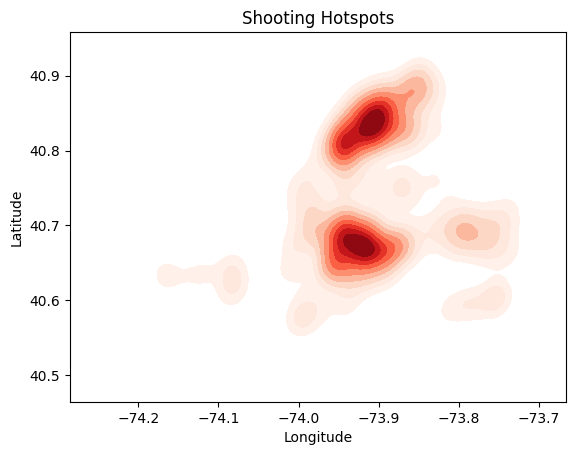

In [17]:

sns.kdeplot(x=df["Longitude"], y=df["Latitude"], cmap="Reds", fill=True)
plt.title("Shooting Hotspots")
plt.show()

### <center>ML Algorithm Design/Development, Training and Test Data Analysis</center>

The next step in our data analysis is designing and developing our ML algorithm, and then using our data to train and test it.

K means clustering would be the best at finding out conclusions on the geographic areas which are prone to types of crime, and if we can predict future criminal activity. This is because, as we can see there are certain density spots that show hotspots like Brooklyn, The Bronx, and upper Manhattan. We can look at the chi squared test which shows that it is not evenly distributed throughout boroughs. Using a clustering method helps us to do multiple things like: group shooting incidents based on coordinates, identify neighborhood patterns (rather than borough level trends), and add temporal features to understand where AND when shootings tend to occur. 

Since the research question asks specifically about geographic tendencies, clustering would directly help solve this by quantifying and inserting into a visual, the spatial patterns. We could then lay the groundwork for solving future predictions. Using unsupervised learning technique, like clustering, we are able to discover inherent patterns in data rather than predict specific outcomes, which aligns with our geographic focus.


In [19]:
# extract features for clustering: geographic coordinates
coords = df[['Latitude', 'Longitude']].dropna()

# standardize the features for K-means
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(coords)

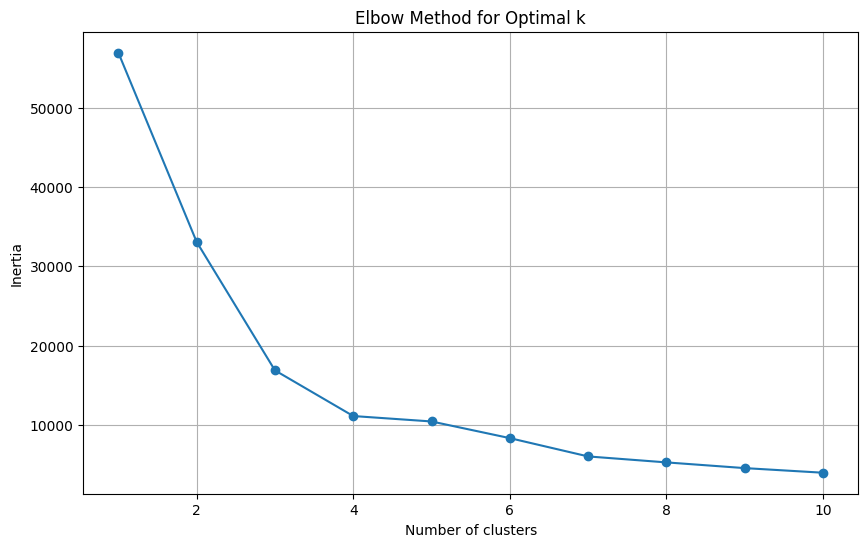

In [20]:
# determining the optimal number of clusters
# function to evaluate number of clusters using inertia (elbow method)
def find_optimal_clusters(data, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()
    return inertias

# find optimal number of clusters
inertias = find_optimal_clusters(scaled_coords)

In [21]:
# applying k means clustering
# based on the elbow curve, let's use 5 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_coords)

# add cluster labels to original data
coords_with_clusters = coords.copy()
coords_with_clusters['Cluster'] = clusters

# analyze each cluster's properties
cluster_analysis = coords_with_clusters.groupby('Cluster').agg({
    'Latitude': ['mean', 'min', 'max', 'count'],
    'Longitude': ['mean', 'min', 'max'],
})

print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
          Latitude                               Longitude             \
              mean        min        max  count       mean        min   
Cluster                                                                 
0        40.623645  40.511586  40.647127    828 -74.110746 -74.249303   
1        40.670716  40.572006  40.773511  12243 -73.934006 -74.020939   
2        40.832839  40.735829  40.910818  12063 -73.904606 -73.988070   
3        40.600956  40.569363  40.661270    723 -73.772672 -73.864106   
4        40.696329  40.649990  40.821290   2646 -73.788515 -73.864490   

                    
               max  
Cluster             
0       -74.021013  
1       -73.859781  
2       -73.790438  
3       -73.726533  
4       -73.702046  


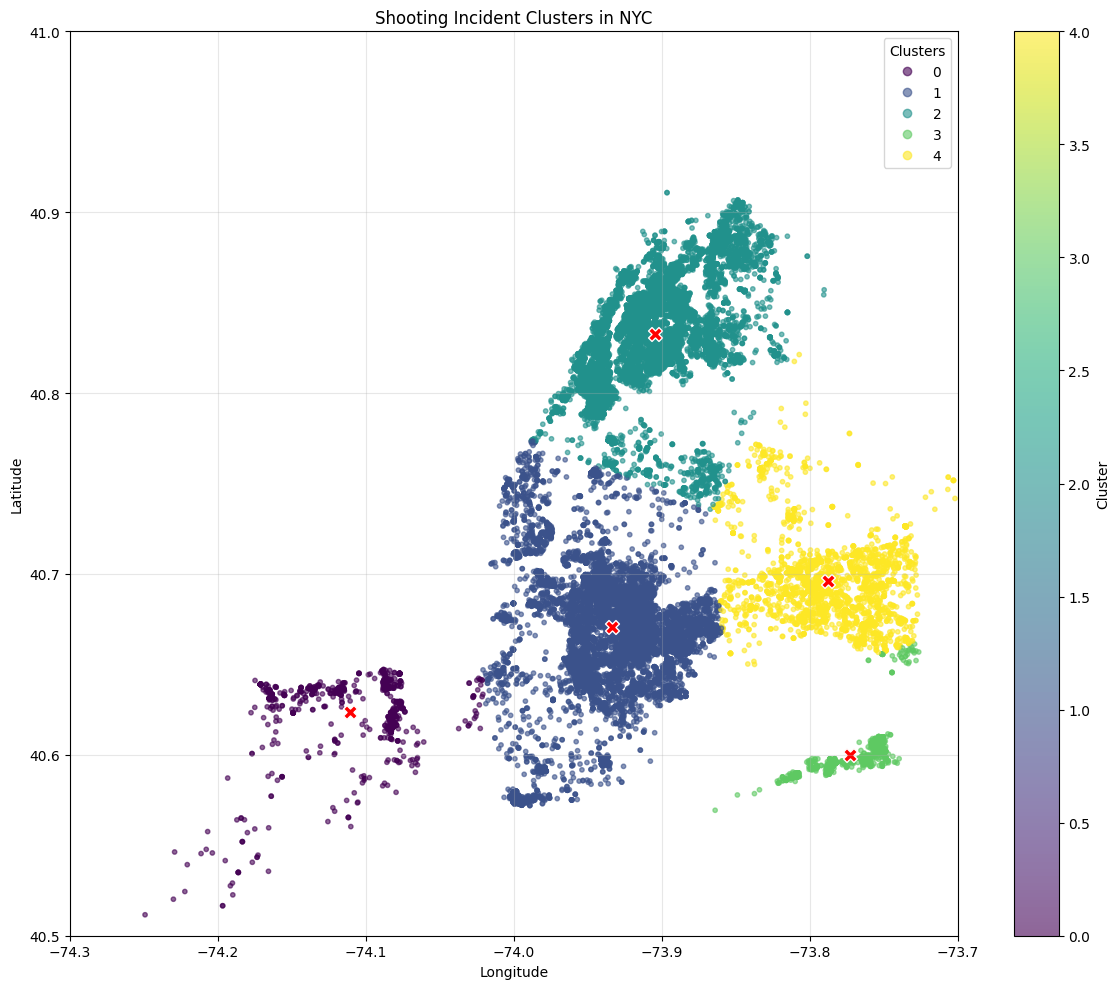

In [22]:
# visualizing the geographic clusters
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    coords_with_clusters['Longitude'],
    coords_with_clusters['Latitude'],
    c=coords_with_clusters['Cluster'],
    cmap='viridis',
    alpha=0.6,
    s=10
)

# add the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 1], centers[:, 0], marker='X', color='red', s=100,
            label='Cluster Centers', edgecolor='white')

# NYC map boundaries (approximate)
plt.xlim(-74.3, -73.7)
plt.ylim(40.5, 41.0)

plt.title('Shooting Incident Clusters in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

In [23]:
# merging cluster labels with original data for further analysis
# merge back to original data
df_merged = pd.merge(df,
                     pd.DataFrame({'Latitude': coords['Latitude'],
                                  'Longitude': coords['Longitude'],
                                  'Cluster': clusters}),
                     on=['Latitude', 'Longitude'],
                     how='inner')

# add hour and year information for temporal analysis
df_merged['Hour'] = df_merged['OCCUR_TIME'].dt.hour
df_merged['Year'] = df_merged['OCCUR_DATE'].dt.year

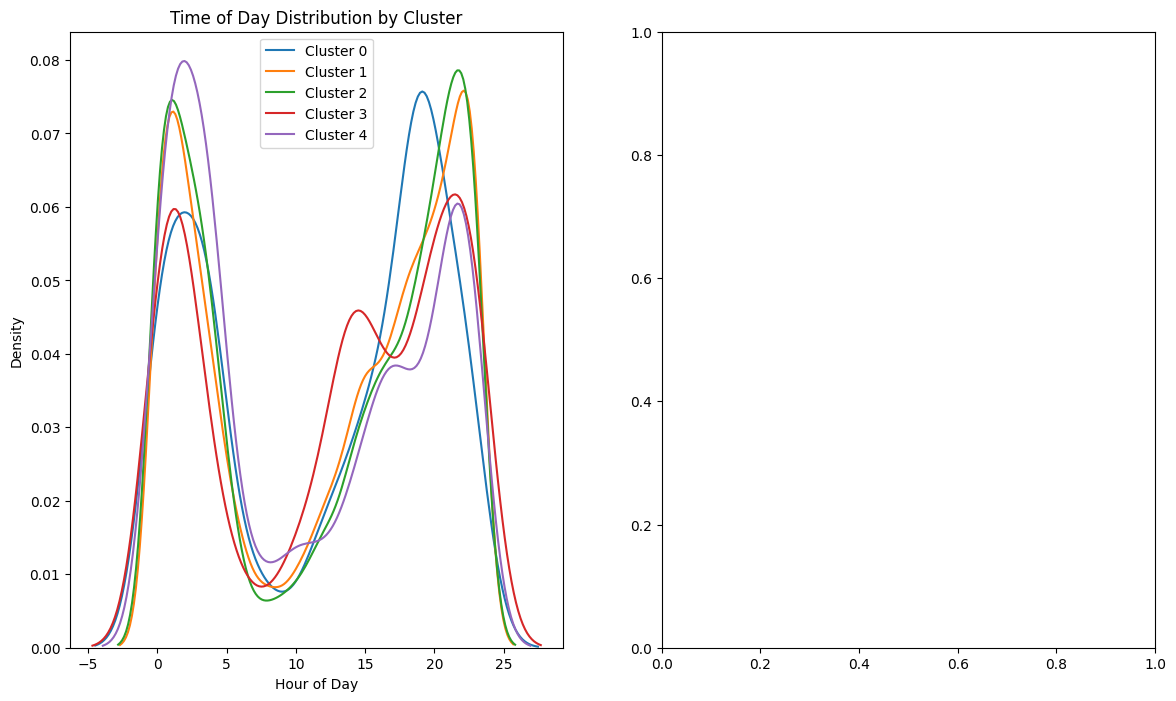

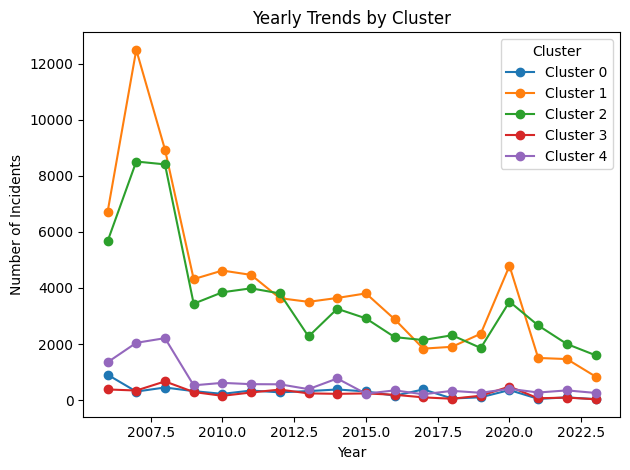

In [24]:
plt.figure(figsize=(14, 8))

# hour distribution by cluster
plt.subplot(1, 2, 1)
for cluster in range(k):
    cluster_data = df_merged[df_merged['Cluster'] == cluster]
    if not cluster_data.empty:
        sns.kdeplot(cluster_data['Hour'].dropna(), label=f'Cluster {cluster}')
plt.title('Time of Day Distribution by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.legend()

# year distribution by cluster
plt.subplot(1, 2, 2)
# ensure we have data for all years/clusters by reindexing
years = sorted(df_merged['Year'].dropna().unique())
cluster_counts = pd.DataFrame(index=years)

for cluster in range(k):
    yearly_data = df_merged[df_merged['Cluster'] == cluster].groupby('Year').size()
    cluster_counts[f'Cluster {cluster}'] = yearly_data

# fill NaN values with 0 and plot
cluster_counts.fillna(0).plot(marker='o')
plt.title('Yearly Trends by Cluster')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

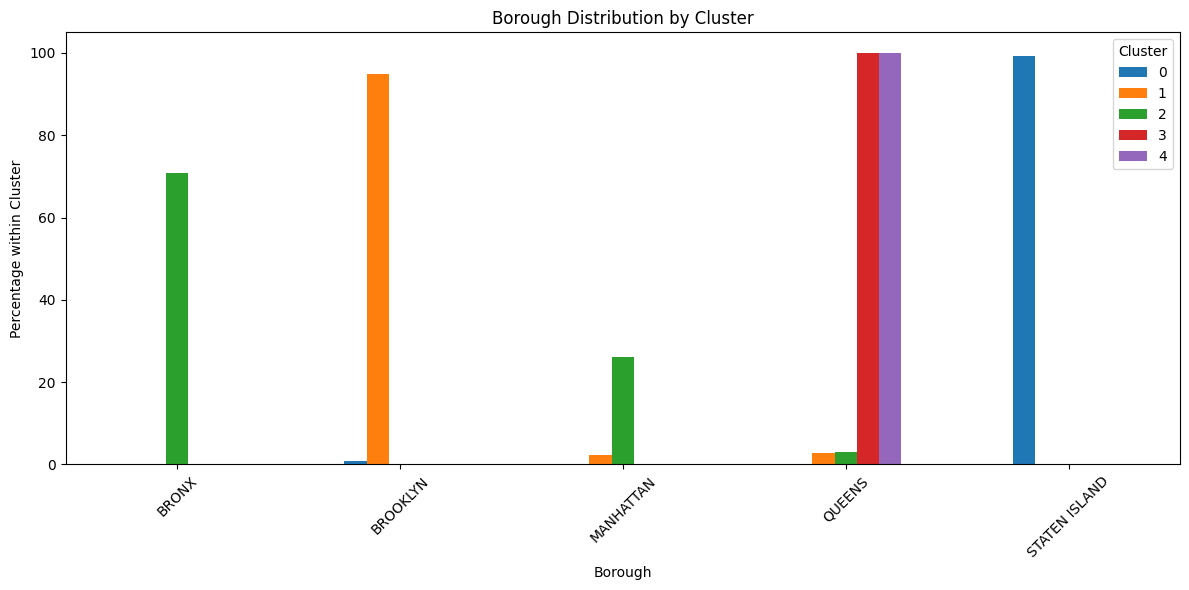

In [25]:
# borough distribution by cluster
borough_cluster = pd.crosstab(df_merged['BORO'], df_merged['Cluster'], normalize='columns') * 100
borough_cluster.plot(kind='bar', figsize=(12, 6))
plt.title('Borough Distribution by Cluster')
plt.xlabel('Borough')
plt.ylabel('Percentage within Cluster')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# create a function to analyze cluster characteristics
def analyze_cluster(df, cluster_num):
    cluster_data = df[df['Cluster'] == cluster_num]

    # borough distribution
    borough_dist = cluster_data['BORO'].value_counts(normalize=True) * 100

    # time analysis
    hour_dist = cluster_data['Hour'].value_counts(normalize=True).sort_index() * 100
    peak_hours = hour_dist.nlargest(3).index.tolist()

    # victim characteristics
    vic_race_dist = cluster_data['VIC_RACE'].value_counts(normalize=True) * 100
    vic_age_dist = cluster_data['VIC_AGE_GROUP'].value_counts(normalize=True) * 100

    # murder rate
    murder_rate = (cluster_data['STATISTICAL_MURDER_FLAG'].sum() / len(cluster_data)) * 100

    # location types
    loc_dist = cluster_data['LOCATION_DESC'].value_counts(normalize=True) * 100

    print(f"===== CLUSTER {cluster_num} ANALYSIS =====")
    print(f"Number of incidents: {len(cluster_data)} ({len(cluster_data)/len(df_merged)*100:.1f}% of total)")
    print(f"\nGeographic center: Lat {cluster_data['Latitude'].mean():.4f}, Long {cluster_data['Longitude'].mean():.4f}")
    print(f"\nBorough distribution:")
    for borough, pct in borough_dist.items():
        print(f"  {borough}: {pct:.1f}%")

    print(f"\nPeak hours: {', '.join([f'{h}:00' for h in peak_hours])}")

    print(f"\nVictim race distribution:")
    for race, pct in vic_race_dist.nlargest(3).items():
        print(f"  {race}: {pct:.1f}%")

    print(f"\nVictim age distribution:")
    for age, pct in vic_age_dist.nlargest(3).items():
        print(f"  {age}: {pct:.1f}%")

    print(f"\nMurder rate: {murder_rate:.1f}%")

    print(f"\nTop location types:")
    for loc, pct in loc_dist.nlargest(3).items():
        if not pd.isna(loc):
            print(f"  {loc}: {pct:.1f}%")

    print("\n" + "="*30 + "\n")

# analyze each cluster
for i in range(k):
    analyze_cluster(df_merged, i)

===== CLUSTER 0 ANALYSIS =====
Number of incidents: 5088 (3.2% of total)

Geographic center: Lat 40.6304, Long -74.1289

Borough distribution:
  STATEN ISLAND: 99.1%
  BROOKLYN: 0.9%

Peak hours: 19:00, 0:00, 4:00

Victim race distribution:
  BLACK: 71.2%
  WHITE HISPANIC: 18.6%
  WHITE: 6.3%

Victim age distribution:
  25-44: 40.5%
  18-24: 35.5%
  <18: 12.0%

Murder rate: 24.9%

Top location types:
  MULTI DWELL - APT BUILD: 59.5%
  MULTI DWELL - PUBLIC HOUS: 19.1%
  PVT HOUSE: 10.0%


===== CLUSTER 1 ANALYSIS =====
Number of incidents: 73729 (46.3% of total)

Geographic center: Lat 40.6717, Long -73.9286

Borough distribution:
  BROOKLYN: 95.0%
  QUEENS: 2.7%
  MANHATTAN: 2.4%

Peak hours: 23:00, 1:00, 22:00

Victim race distribution:
  BLACK: 84.2%
  WHITE HISPANIC: 8.7%
  BLACK HISPANIC: 4.8%

Victim age distribution:
  25-44: 42.6%
  18-24: 38.3%
  <18: 11.9%

Murder rate: 22.4%

Top location types:
  MULTI DWELL - PUBLIC HOUS: 56.2%
  MULTI DWELL - APT BUILD: 19.5%
  BAR/NIGHT C

### <center>Visualization</center>

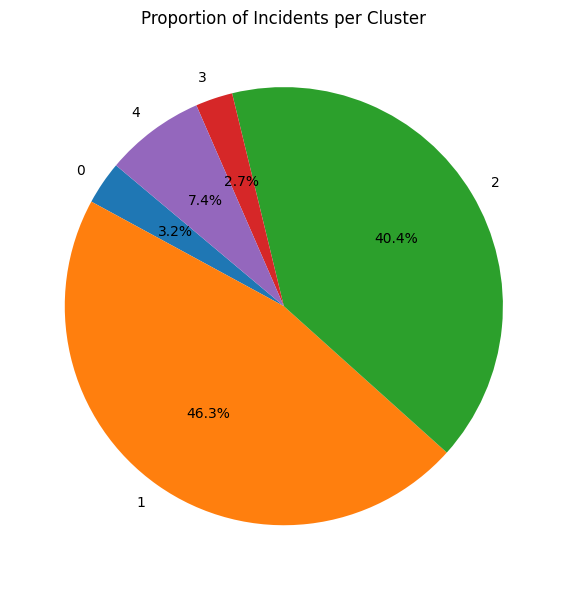

In [27]:
cluster_counts = df_merged['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
cluster_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('tab10', len(cluster_counts))
)
plt.title('Proportion of Incidents per Cluster')
plt.ylabel('')
plt.tight_layout()
plt.show()

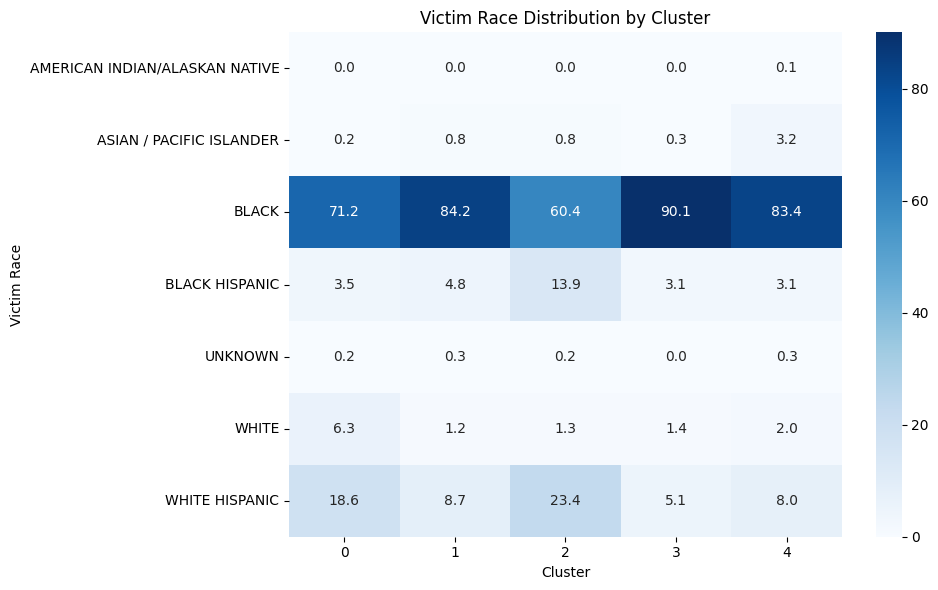

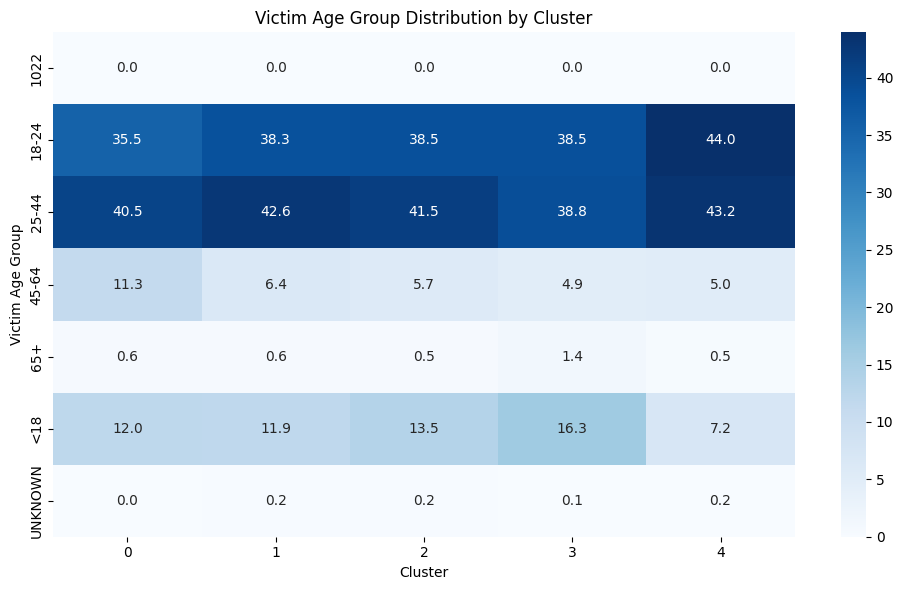

In [28]:
# Heatmap for Victim Race
race_cluster = pd.crosstab(df_merged['VIC_RACE'], df_merged['Cluster'], normalize='columns') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(race_cluster, annot=True, cmap='Blues', fmt='.1f')
plt.title('Victim Race Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Victim Race')
plt.tight_layout()
plt.show()

# Heatmap for Victim Age
age_cluster = pd.crosstab(df_merged['VIC_AGE_GROUP'], df_merged['Cluster'], normalize='columns') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(age_cluster, annot=True, cmap='Blues', fmt='.1f')
plt.title('Victim Age Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Victim Age Group')
plt.tight_layout()
plt.show()

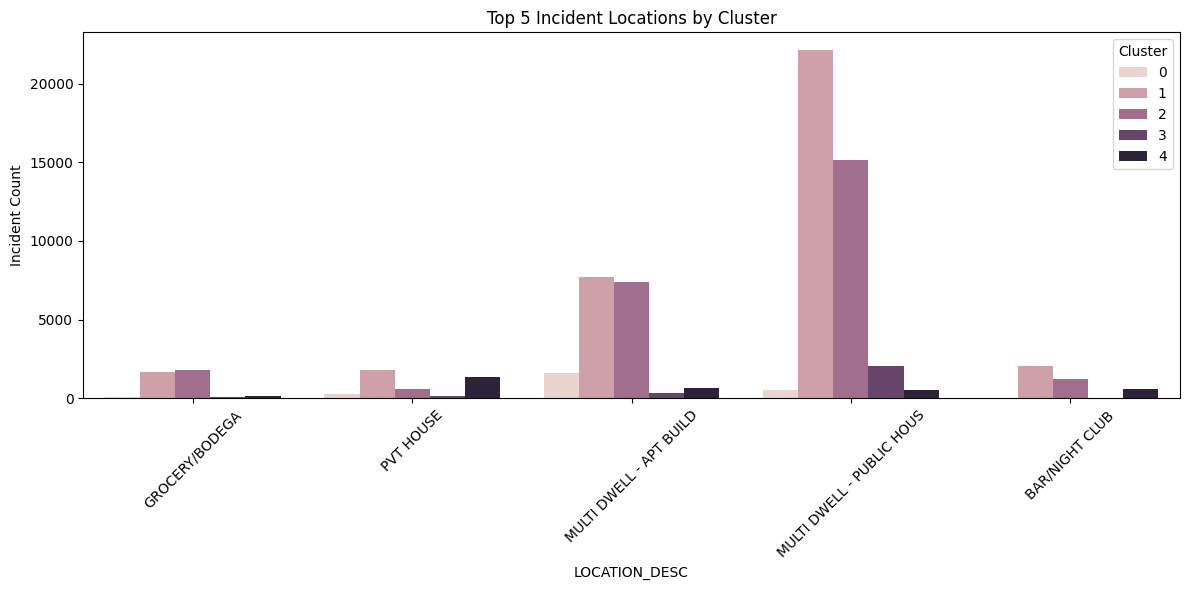

In [30]:
top_locs = df_merged['LOCATION_DESC'].value_counts().nlargest(5).index
top_loc_df = df_merged[df_merged['LOCATION_DESC'].isin(top_locs)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_loc_df, x='LOCATION_DESC', hue='Cluster')
plt.title('Top 5 Incident Locations by Cluster')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

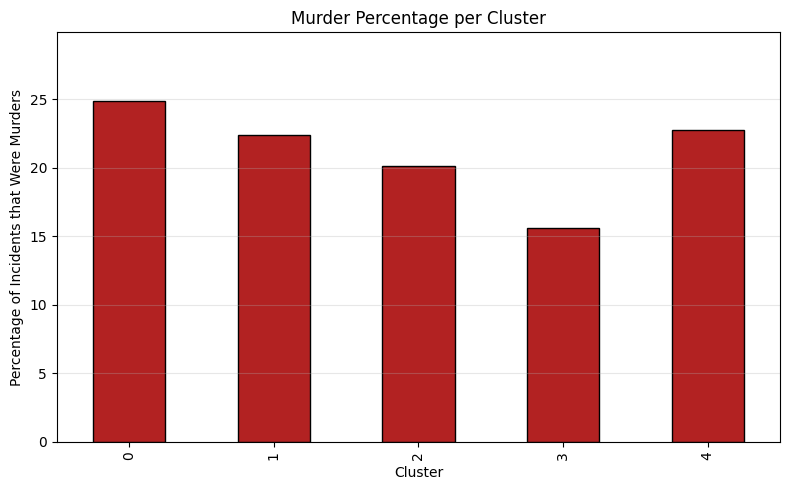

In [31]:
# Group by cluster and calculate murder rate
murder_pct = df_merged.groupby('Cluster')['STATISTICAL_MURDER_FLAG'].mean() * 100

plt.figure(figsize=(8, 5))
murder_pct.plot(kind='bar', color='firebrick', edgecolor='black')
plt.title('Murder Percentage per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Incidents that Were Murders')
plt.ylim(0, murder_pct.max() + 5)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### <center>Result Analysis and Conclusion</center><br><br>
This is the part of the lifecycle where we attempt to utilize our data analysis to draw conclusions and potentially infer certain portions of our data.
<br><br>

Based on our analysis and visualizatons, we can safely answer the following questions: <br><br>


**"Are certain geographic areas more prone to specific types of crime?"**


*   Yes, as shown in the "distribution of shooting incidents by borough" bar graph, Brooklyn had the most shooting incidents but was followed somewhat closely by the Bronx.
<br><br>

**What time of day do most shootings occur?**



*   From the "time of day distribution by cluster" graph, we can see that most shootings occur between the hours of 6PM and 4AM. the density of shootings per borough varies slightly depending on which ones we are comparing, but in general they follow that
<br><br>

**Are there any demographic trends among victims?**


*   Yes, as shown in both the "victim race distribution by cluster" graph and the "victim age group distribution by cluster" graph, we can see that the vast majority of shooting victims are Black and between the ages of 18 and 44 among all clusters.
<br><br>

**What kinds of locations do shootings take place at per borough?**



*   Based on the "Top 5 Incident Locations by Cluster" graph, we see that shooting incidents in Staten Island mostly take place in multi-dwell apartment buildings, while every other borough's shooting incidents mostly take place at multi-dwell public houses.











<br><br>
Overall, we can use these results to help predict crime rates based on borough, location, and time of day and implement solutions such as increased security to help the citizens of New York City feel safer in their homes.
<br><br>

If we could conduct further reasearch, we would look into other types of crimes and their relation to borough, time they occurred, location, and demographic trends among the victims. We could then look into solutions that would aid in lowering the crime rate in each borough, increasing the safety of citizens. Lastly, we could expand our dataset to include the entire state and see how trends change based on our new data.